## Combining Datasets

In this script we will combine the data gathered from the depreessive scrapping script with the data from the mostly non-depressive scripts,
analyse their target distribution, standardise their formats and then construct a final dataset containing all of them.

The data from the depressive script hsa been manually reviewed and annotated by several different team members, and then reviewwd one more
time by aonther member, to ensure consistency.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Read in non-depressive dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df0 = pd.read_csv("/content/drive/MyDrive/Dataset1/depression_data/general_tweets.csv")

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Dataset1/depression_data/tweets_final_1_clean.csv", engine='python')
df2 = pd.read_csv("/content/drive/MyDrive/Dataset1/depression_data/tweets_final_2_clean.csv", engine='python')
df3 = pd.read_csv("/content/drive/MyDrive/Dataset1/depression_data/tweets_final_3_clean.csv", engine='python')

In [ ]:
df4 = pd.read_csv("/content/drive/MyDrive/Dataset1/depression_data/tweets_final_4_clean.csv", engine='python')
df5 = pd.read_csv("/content/drive/MyDrive/Dataset1/depression_data/tweets_final_5_clean.csv", engine='python')
df6 = pd.read_csv("/content/drive/MyDrive/Dataset1/depression_data/tweets_final_6_clean.csv", engine='python')

In [ ]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


**2. Briefly analyse their content**

In [ ]:
df0.head(2)

,Unnamed: 0,ID,Tweet,Affect Dimension,Intensity Score,target
0,0,2018-En-03332,Be happy. Be confident. Be kind.\n\n #KissablesLoveSMShopmag\nAllOutDenimFor KISSMARC,joy,0.661,0
1,1,2018-En-01146,@queenjlouise @mamaw_gereck awe thanks 😊,fear,0.089,0


In [ ]:
df0.head(2)

,Unnamed: 0,ID,Tweet,Affect Dimension,Intensity Score,target
0,0,2018-En-03332,Be happy. Be confident. Be kind.\n\n #KissablesLoveSMShopmag\nAllOutDenimFor KISSMARC,joy,0.661,0
1,1,2018-En-01146,@queenjlouise @mamaw_gereck awe thanks 😊,fear,0.089,0


In [ ]:
df1.head(2)

,Unnamed: 0,id,conversation_id,date,username,tweet_processed,hashtags,tweet_original,target
0,1,1.163050e+18,1.163050e+18,8/18/2019,lowerdepression,"mood can be caused by infectious diseases, nutritional deficiencies, neurological conditions, and physiological problems.",['#depressed'],"#Depressed mood can be caused by infectious diseases, nutritional deficiencies, neurological conditions, and physiological problems.",0
1,6,1.163030e+18,1.163030e+18,8/18/2019,chrisbontheweb,"With all of this unnessary family drama, I feel like moving far away and starting over again. From one thing to another I just feel . Hope I get through this",['#depressed'],"With all of this unnessary family drama, I feel like moving far away and starting over again. From one thing to another I just feel #depressed. Hope I get through this",1


In [ ]:
df2.head(2)

,Unnamed: 0,id,conversation_id,date,username,tweet_processed,hashtags,tweet_original,target
0,1681,1.160000e+18,1.160000e+18,8/17/2019,samplergal1,"Looking for some beautiful images. Having a really crappy week, and need some support. . Post some great beauty. Thank you.",['#depression'],"Looking for some beautiful images. Having a really crappy week, and need some support. #depression. Post some great beauty. Thank you.",1
1,1709,1.160000e+18,1.160000e+18,8/17/2019,focusbalance,"When teens feel down, there are ways they can cope with these feelings to avoid serious , such as make new friends or social connections and participate in sports or school activities. Call Focus & Balance at 210-858-9980 to learn more and see how we can help. pic.twitter.com/ydrYcTBD2r",['#depression'],"When teens feel down, there are ways they can cope with these feelings to avoid serious #depression, such as make new friends or social connections and participate in sports or school activities. Call Focus & Balance at 210-858-9980 to learn more and see how we can help. pic.twitter.com/ydrYcTBD2r",0


In [ ]:
df3.head(2)

,Unnamed: 0,id,conversation_id,date,username,tweet_processed,hashtags,tweet_original,target
0,462,6.813310e+17,6.813310e+17,12/28/2015,siradjames,Why is tomorrow Monday??? & LOL,"['#sad', '#depressed']",Why is tomorrow Monday??? #Sad & #Depressed LOL,0
1,465,6.813230e+17,6.813230e+17,12/28/2015,angel_is_dead,I feel like I'm annoying like Always�,"['#depressed', '#selfhate']",I feel like I'm annoying like Always� #depressed #selfhate,1


In [ ]:
df4.head(2)

,Unnamed: 0,id,conversation_id,date,username,tweet_processed,hashtags,tweet_original,target
0,0,8.150000e+17,8.150000e+17,12/31/2016,sterlovesfood,2016 was the best year so far,"['#salty', '#depressed']",2016 was the best year so far #salty #depressed,0
1,7,8.150000e+17,8.150000e+17,12/31/2016,shannonmburke91,So over new years think I'm just going to sleep into the new year.,"['#depressed', '#over2016']",So over new years think I'm just going to sleep into the new year. #depressed #over2016,0


In [ ]:
df5.head(2)

,Unnamed: 0,id,conversation_id,date,username,tweet_processed,hashtags,tweet_original,target
0,1979,8.149690e+17,8.149690e+17,12/30/2016,nicosantana83,"On topic of famous people , apparently stuff needs to be put in place for mental illness. What about non famous people",['#depression'],"On topic of famous people , apparently stuff needs to be put in place for mental illness. What about non famous people #depression",0
1,1985,8.149660e+17,8.149660e+17,12/30/2016,ketaminesavedme,Tripped hard today! This is promising!,"['#ketamine', '#depression', '#bipolar']",Tripped hard today! This is promising! #ketamine #depression #bipolar,1


In [ ]:
df3.head(2)

,Unnamed: 0,id,conversation_id,date,username,tweet_processed,hashtags,tweet_original,target
0,462,6.813310e+17,6.813310e+17,12/28/2015,siradjames,Why is tomorrow Monday??? & LOL,"['#sad', '#depressed']",Why is tomorrow Monday??? #Sad & #Depressed LOL,0
1,465,6.813230e+17,6.813230e+17,12/28/2015,angel_is_dead,I feel like I'm annoying like Always�,"['#depressed', '#selfhate']",I feel like I'm annoying like Always� #depressed #selfhate,1


[Text(0.5, 1.0, 'target distribution - df6')]

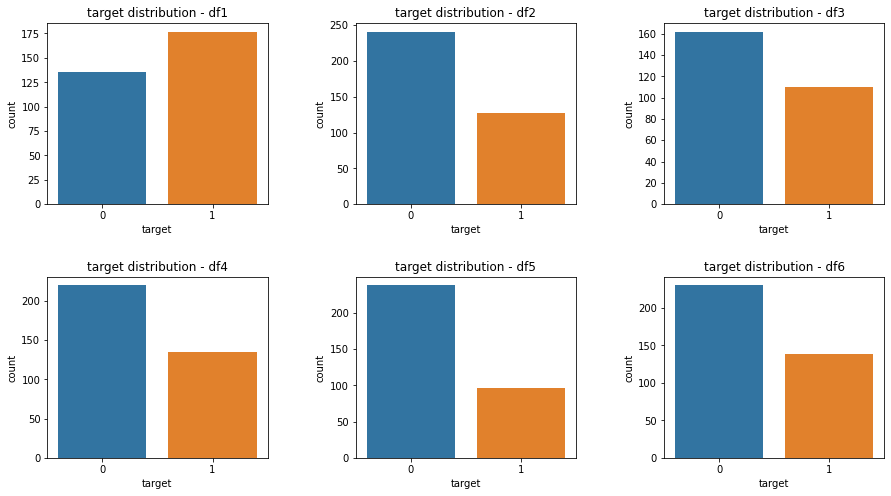

In [ ]:
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax1 = fig.add_subplot(2,3,1)
sns.countplot(x='target', data=df1)
ax1.set(title="target distribution - df1")

ax2 = fig.add_subplot(2,3,2)
sns.countplot(x='target', data=df2)
ax2.set(title="target distribution - df2")

ax3 = fig.add_subplot(2,3,3)
sns.countplot(x='target', data=df3)
ax3.set(title="target distribution - df3")

ax4 = fig.add_subplot(2,3,4)
sns.countplot(x='target', data=df4)
ax4.set(title="target distribution - df4")

ax5 = fig.add_subplot(2,3,5)
sns.countplot(x='target', data=df5)
ax5.set(title="target distribution - df5")

ax6 = fig.add_subplot(2,3,6)
sns.countplot(x='target', data=df6)
ax6.set(title="target distribution - df6")

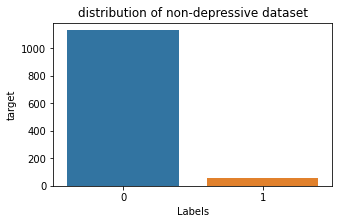

In [ ]:
fig = plt.figure(figsize=(5,3))
plt.title('distribution of non-depressive dataset')
ax = sns.barplot(x=df0.target.unique(),y=df0.target.value_counts());
ax.set(xlabel='Labels');

**3. Standardise dataset format**

In [ ]:
df0 = df0[['Tweet','target']].copy()

df1 = df1[['tweet_processed','target']].copy()
df2 = df2[['tweet_processed','target']].copy()
df3 = df3[['tweet_processed','target']].copy()
df4 = df4[['tweet_processed','target']].copy()
df5 = df5[['tweet_processed','target']].copy()
df6 = df6[['tweet_processed','target']].copy()

In [ ]:
df0 = df0.rename(columns = {"Tweet": "tweet"}) 

df1 = df1.rename(columns = {"tweet_processed": "tweet"}) 
df2 = df2.rename(columns = {"tweet_processed": "tweet"}) 
df3 = df3.rename(columns = {"tweet_processed": "tweet"}) 
df4 = df4.rename(columns = {"tweet_processed": "tweet"}) 
df5 = df5.rename(columns = {"tweet_processed": "tweet"}) 
df6 = df6.rename(columns = {"tweet_processed": "tweet"}) 

let´s skep df1 and df2 for the time being, as the labels are a little inconsistent

In [ ]:
df_all = pd.concat([df0, df1, df2, df3, df4, df5, df6])

In [ ]:
df_all = df_all.sample(frac=1).reset_index(drop=True)
df_all.head(10)

,tweet,target
0,"Is @Tonysuniverse on Fourth of July holiday in his mind?\nOr is the heatwave getting to him, ha?\nGOTTA use your mic! 😀\nThanks for the giggle!",0
1,"The sad thing when you lie all the time is that when you say the truth, it always sounds like a lie even to yourself.",0
2,@CNN @cnnbrk what is the #FakeNews of the day? Need my #laughter to start my day. @foxandfriends @realDonaldTrump @kilmeade @PeteHegseth,0
3,"3rd step to overcoming and is to realise that you need to change something. Do the same things, get the same results",0
4,Up bright and early for class today 😂👌🏾 I can't miss nane nother one,0
5,�?I Don't Love You Anymore - ANOHNI,0
6,"If you're so that you had a dream you died and then you were annoyed when you woke up, clap your hands! ??��??��??��??��??��??��",0
7,"Ground control to Captain Tom, eclipse was mind blowing #solareclipse2017",0
8,a neend in need is a neend indeed,0
9,Lately - nothing has been going right .,1


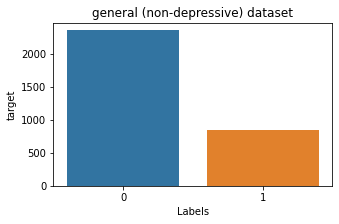

In [ ]:
fig = plt.figure(figsize=(5,3))
plt.title('general (non-depressive) dataset')
ax = sns.barplot(x=df_all.target.unique(),y=df_all.target.value_counts());
ax.set(xlabel='Labels');

In [ ]:
from sklearn.utils import resample

In [ ]:
df_majority=df_all[df_all.target==0]
df_minority=df_all[df_all.target==1]
df_majority_downsampled = resample(df_majority,
                                  replace=False,
                                  n_samples=843,
                                  random_state=123)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.target.value_counts()

1    843
0    843
Name: target, dtype: int64

In [ ]:
df_all.target.value_counts()

0    2357
1    843 
Name: target, dtype: int64

In [ ]:
df_downsampled.to_csv("/content/drive/MyDrive/Dataset1/depression_data/tweets_combined.csv")

## Conclusion:
Even though the target is not balanced as there are more non-depressive data, we believe it covers a good range of depressive and non-depressive tweets and would be a good basis for developing a depression detection classifier